#Importing Libraies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Data Reading 

In [ ]:
data = pd.read_csv('datatraining.txt', error_bad_lines=False)
data_test_1 = pd.read_csv('datatest1.txt', error_bad_lines=False)
data_test_2 = pd.read_csv('datatest2.txt', error_bad_lines=False)

#Data Nature

**Number of (rows, columns)**

In [ ]:
data.shape

In [ ]:
data_test_1.shape

In [ ]:
data_test_2.shape

**Snippets form data**

In [ ]:
data.head()

**Data information**

In [ ]:
data.info()

**Data statistics**

In [ ]:
data.describe()

**Count valuew of Occupancy**

In [ ]:
data['Occupancy'].value_counts()

In [ ]:
data_test_1['Occupancy'].value_counts()

In [ ]:
data_test_2['Occupancy'].value_counts()

**Drop column date**

In [ ]:
data.drop('date', axis=1, inplace=True)
data_test_1.drop('date', axis=1, inplace=True)
data_test_2.drop('date', axis=1, inplace=True)

#Data Distribution

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['Temperature'])
plt.title('Distribution Plot for Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.savefig('Distribution Plot for Temperature.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['Humidity'])
plt.title('Distribution Plot for Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.savefig('Distribution Plot for Humidity.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['Light'])
plt.ylim(0, 250)
plt.title('Distribution Plot for Light')
plt.xlabel('Light')
plt.ylabel('Count')
plt.savefig('Distribution Plot for Light.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['CO2'])
plt.title('Distribution Plot for CO2')
plt.xlabel('CO2')
plt.ylabel('Count')
plt.savefig('Distribution Plot for CO2.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['HumidityRatio'])
plt.title('Distribution Plot for HumidityRatio')
plt.xlabel('HumidityRatio')
plt.ylabel('Count')
plt.savefig('Distribution Plot for HumidityRatio.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['Occupancy'])
plt.title('Distribution Plot for Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Count')
plt.savefig('Distribution Plot for Occupancy.png')
plt.show()

**Heatmap of correlation**

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(data.corr(), annot=True, linewidths=.2)
plt.savefig('Correlation Table for Feature.png')

**Box Plot for Features**

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=data.drop(['Occupancy'], axis=1), orient="h", palette="Set2")
plt.savefig('Box Plot for Features.png')

#Data Scaling 

**Scale data using Standard Scaler**

In [ ]:
scaler = StandardScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(data[columns]))

data[columns] = scaler.transform(np.array(data[columns]))
data_test_1[columns] = scaler.transform(np.array(data_test_1[columns]))
data_test_2[columns] = scaler.transform(np.array(data_test_2[columns]))

**Box Plot after Scaling**

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=data.drop(['Occupancy'], axis=1), orient="h", palette="Set2")
plt.savefig('Box Plot for Features After scaling.png')

#Data Preprocessing

**Spliting data into X, Y**

In [ ]:
y_values = data['Occupancy'].values
x_values = data[['Temperature',	'Humidity',	'Light',	'CO2',	'HumidityRatio']].values

In [ ]:
x_values.shape, y_values.shape

**Spliting test data 1 & 2 into X,Y**

In [ ]:
y_test_1 = data_test_1['Occupancy'].values
x_test_1 = data_test_1[['Temperature',	'Humidity',	'Light',	'CO2',	'HumidityRatio']].values

y_test_2 = data_test_2['Occupancy'].values
x_test_2 = data_test_2[['Temperature',	'Humidity',	'Light',	'CO2',	'HumidityRatio']].values

In [ ]:
y_test_1.shape, x_test_1.shape

In [ ]:
y_test_2.shape, x_test_2.shape

**Split data into train & test data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=40)

In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_test.shape, y_test.shape

#Logistic Regression Algorithm

In [ ]:
LR_Model = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
                           solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
LR_Model = LR_Model.fit(x_train, y_train)

In [ ]:
lr_y_pred   = LR_Model.predict(x_test)
lr_y_pred_1 = LR_Model.predict(x_test_1)
lr_y_pred_2 = LR_Model.predict(x_test_2)

In [ ]:
print('---------------------------------------------------------------------------------------')
print("{:20}\t|\t{:20}\t|\t{:20}".format('Original', 'Test 1', 'Test 2'))
print('---------------------------------------------------------------------------------------')
print("{:>15}\t|\t{:>15}\t|\t{:>15}".format(
    accuracy_score(y_test, lr_y_pred)*100, 
    accuracy_score(y_test_1, lr_y_pred_1)*100, 
    accuracy_score(y_test_2, lr_y_pred_2)*100)
)
print('---------------------------------------------------------------------------------------')

In [ ]:
print(classification_report(y_test, lr_y_pred))

In [ ]:
print(classification_report(y_test_1, lr_y_pred_1))

In [ ]:
print(classification_report(y_test_2, lr_y_pred_2))

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test, lr_y_pred), annot=True, cmap='Oranges', fmt="d")
plt.title('Confusion Matrix of Data')
plt.savefig('Confusion Matrix of Data Logistic Regression.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test_1, lr_y_pred_1), annot=True, cmap='Reds', fmt="d")
plt.title('Confusion Matrix of Test 1')
plt.savefig('Confusion Matrix of Test 1 Logistic Regression.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test_2, lr_y_pred_2), annot=True, cmap='Blues', fmt="d")
plt.title('Confusion Matrix of Test 2')
plt.savefig('Confusion Matrix of Test 2 Logistic Regression.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))

y_pred_proba = LR_Model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr, label="Data")

y_pred_proba_1 = LR_Model.predict(x_test_1)
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba_1)
plt.plot(fpr, tpr, label="Test 1")

y_pred_proba_2 = LR_Model.predict(x_test_2)
fpr, tpr, _ = roc_curve(y_test_2,  y_pred_proba_2)
plt.plot(fpr, tpr, label="Test 2")

plt.title('ROC Logistic Regression')
plt.legend(loc=4)
plt.savefig('ROC Logistic Regression.png')
plt.show()

#Support Vector Machine Algorithm

In [ ]:
LSVC_Model = LinearSVC()
LSVC_Model = LSVC_Model.fit(x_train, y_train)

In [ ]:
svc_y_pred   = LSVC_Model.predict(x_test)
svc_y_pred_1 = LSVC_Model.predict(x_test_1)
svc_y_pred_2 = LSVC_Model.predict(x_test_2)

In [ ]:
print('---------------------------------------------------------------------------------------')
print("{:20}\t|\t{:20}\t|\t{:20}".format('Original', 'Test 1', 'Test 2'))
print('---------------------------------------------------------------------------------------')
print("{:>15}\t|\t{:>15}\t|\t{:>15}".format(
    accuracy_score(y_test,   svc_y_pred)  *100, 
    accuracy_score(y_test_1, svc_y_pred_1)*100, 
    accuracy_score(y_test_2, svc_y_pred_2)*100)
)
print('---------------------------------------------------------------------------------------')

In [ ]:
print(classification_report(y_test, svc_y_pred))

In [ ]:
print(classification_report(y_test_1, svc_y_pred_1))

In [ ]:
print(classification_report(y_test_2, svc_y_pred_2))

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, cmap='Oranges', fmt="d")
plt.title('Confusion Matrix of Data')
plt.savefig('Confusion Matrix of Data Support Vector Machine.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test_1, svc_y_pred_1), annot=True, cmap='Reds', fmt="d")
plt.title('Confusion Matrix of Test 1')
plt.savefig('Confusion Matrix of Test 1 Support Vector Machine.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test_2, svc_y_pred_2), annot=True, cmap='Blues', fmt="d")
plt.title('Confusion Matrix of Test 2')
plt.savefig('Confusion Matrix of Test 2 Support Vector Machine.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))

y_pred_proba = LSVC_Model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr, label="Data")

y_pred_proba_1 = LSVC_Model.predict(x_test_1)
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba_1)
plt.plot(fpr, tpr, label="Test 1")

y_pred_proba_2 = LSVC_Model.predict(x_test_2)
fpr, tpr, _ = roc_curve(y_test_2,  y_pred_proba_2)
plt.plot(fpr, tpr, label="Test 2")

plt.title('ROC Support Vector Machine')
plt.legend(loc=4)
plt.savefig('ROC Support Vector Machine.png')
plt.show()

#Naive Bayes Algorithm

In [ ]:
GNB_Model = GaussianNB()
GNB_Model = GNB_Model.fit(x_train, y_train)

In [ ]:
gnb_y_pred   = GNB_Model.predict(x_test)
gnb_y_pred_1 = GNB_Model.predict(x_test_1)
gnb_y_pred_2 = GNB_Model.predict(x_test_2)

In [ ]:
print('---------------------------------------------------------------------------------------')
print("{:20}\t|\t{:20}\t|\t{:20}".format('Original', 'Test 1', 'Test 2'))
print('---------------------------------------------------------------------------------------')
print("{:>15}\t|\t{:>15}\t|\t{:>15}".format(
    accuracy_score(y_test,   gnb_y_pred)  *100, 
    accuracy_score(y_test_1, gnb_y_pred_1)*100, 
    accuracy_score(y_test_2, gnb_y_pred_2)*100)
)
print('---------------------------------------------------------------------------------------')

In [ ]:
print(classification_report(y_test, gnb_y_pred))

In [ ]:
print(classification_report(y_test_1, gnb_y_pred_1))

In [ ]:
print(classification_report(y_test_2, gnb_y_pred_2))

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test, gnb_y_pred), annot=True, cmap='Oranges', fmt="d")
plt.title('Confusion Matrix of Data')
plt.savefig('Confusion Matrix of Data Naive Bayes.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test_1, gnb_y_pred_1), annot=True, cmap='Reds', fmt="d")
plt.title('Confusion Matrix of Test 1')
plt.savefig('Confusion Matrix of Test 1 Naive Bayes.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test_2, gnb_y_pred_2), annot=True, cmap='Blues', fmt="d")
plt.title('Confusion Matrix of Test 2')
plt.savefig('Confusion Matrix of Test 2 Naive Bayes.png')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))

y_pred_proba = GNB_Model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr, label="Data")

y_pred_proba_1 = GNB_Model.predict(x_test_1)
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba_1)
plt.plot(fpr, tpr, label="Test 1")

y_pred_proba_2 = GNB_Model.predict(x_test_2)
fpr, tpr, _ = roc_curve(y_test_2,  y_pred_proba_2)
plt.plot(fpr, tpr, label="Test 2")

plt.title('ROC Naive Bayes')
plt.legend(loc=4)
plt.savefig('ROC Naive Bayes.png')
plt.show()

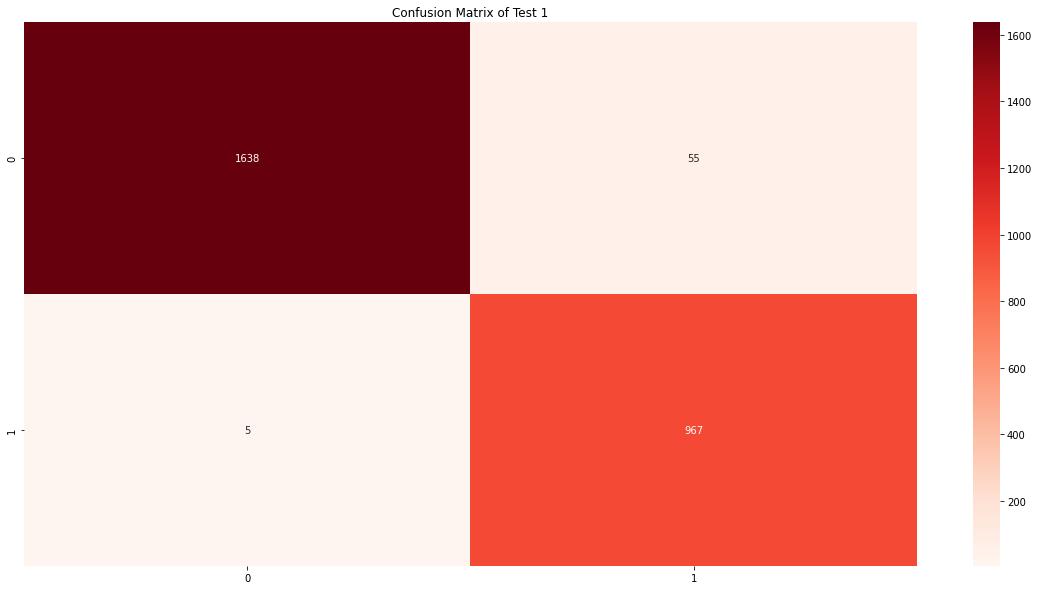

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test_1, gnb_y_pred_1), annot=True, cmap='Reds', fmt="d")
plt.title('Confusion Matrix of Test 1')
plt.savefig('Confusion Matrix of Test 1 Naive Bayes.png')
plt.show()

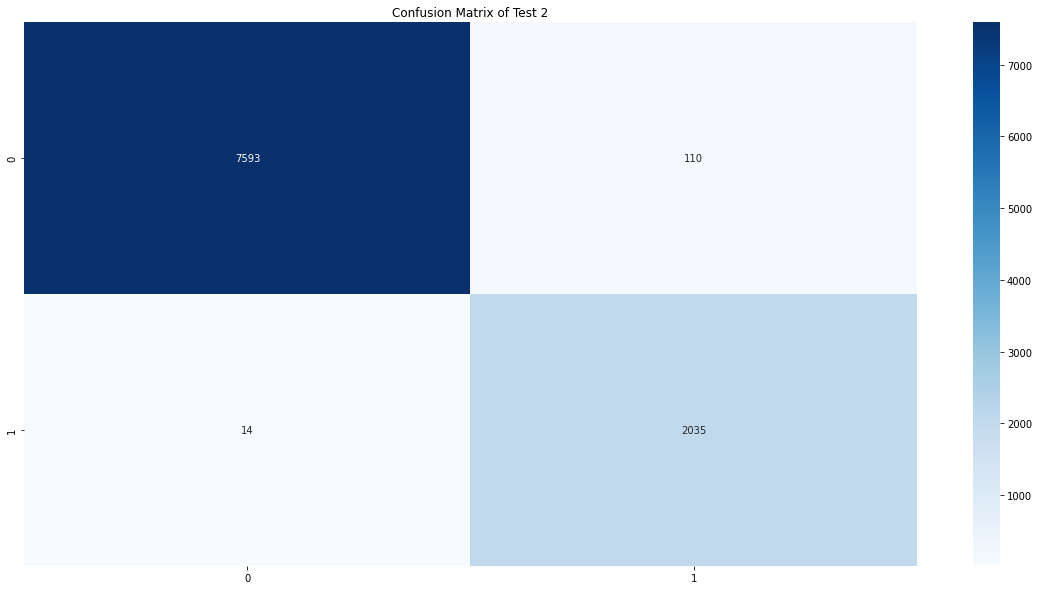

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test_2, gnb_y_pred_2), annot=True, cmap='Blues', fmt="d")
plt.title('Confusion Matrix of Test 2')
plt.savefig('Confusion Matrix of Test 2 Naive Bayes.png')
plt.show()

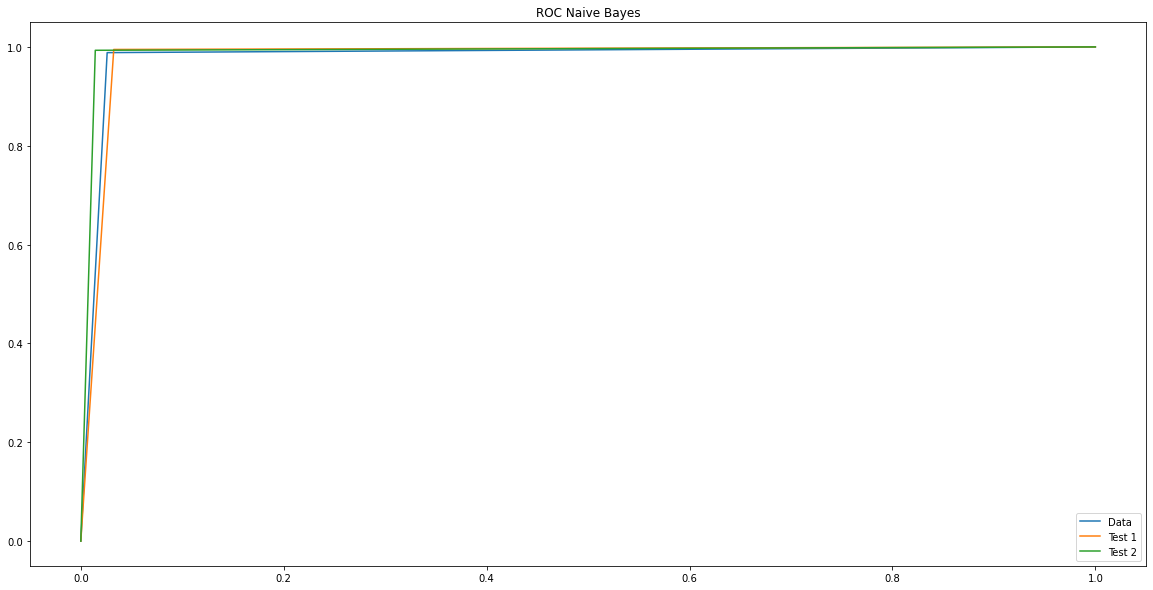

In [ ]:
plt.figure(figsize=(20,10))

y_pred_proba = GNB_Model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr, label="Data")

y_pred_proba_1 = GNB_Model.predict(x_test_1)
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba_1)
plt.plot(fpr, tpr, label="Test 1")

y_pred_proba_2 = GNB_Model.predict(x_test_2)
fpr, tpr, _ = roc_curve(y_test_2,  y_pred_proba_2)
plt.plot(fpr, tpr, label="Test 2")

plt.title('ROC Naive Bayes')
plt.legend(loc=4)
plt.savefig('ROC Naive Bayes.png')
plt.show()